## AI-HUB 데이터 확인

## 📊 df_fixed 라벨 정리 및 균형 조정 요약   

### 1. 상황 (owner_situation_fused) 라벨 정리

- 기존 상황 라벨 `기타` → owner 감정과 조합해 `감정_기타` 형태로 의미 보강  
- 클래스 불균형 존재   

| 주요 클래스          | 소수 클래스(유지/보류)           | 제거 대상/통합 권장  |
|---------------------|-------------------------------|-------------------|
| 휴식/편안           | 화남/불쾌_기타, 불안/공포_기타    | 위생관리, 분리/고립    |
| 놀이/자극           | 공격성_기타                    |                   |
| 편안/안정_기타       |                               |                   |
| 행복/즐거움_기타     |                               |                   |
| 돌아옴/재회         |                               |                   |
| 낯선 상황/불안       |                               |                   |
| 싫은 자극/처벌       |                               |                   |
   

### 2. 감정 (cat_emotion_fused) 라벨

- 감정 라벨 `불안/슬픔` + `공포` 통합 → `불안/공포`  
- 총 5개 감정 라벨 유지  
- 클래스 불균형은 **클래스 가중치 적용** 또는 소수 감정 데이터 증강 고민 가능

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import warnings

# matplotlib findfont 경고 끄기
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", message="findfont: Font family .* not found")

# NotoSansCJK 폰트 경로 지정
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('./data_fin/final_total_dataset.csv')

# meta_json 개수 (전체 파일 수)
print("== meta_json 개수 (전체 파일 수) ==")
print(len(df['meta_json'].unique()))
print()

# number of frames 통계
print("== number of frames 통계 ==")
print(df['number of frames'].describe())
print()

# cat_action 분포 및 유니크 개수
print("== cat_action 분포 ==")
print(df['cat_action'].value_counts())
print(f"🐾 cat_action 라벨 개수: {df['cat_action'].nunique()}")
print()

# cat_emotion 분포 및 유니크 개수
print("== cat_emotion 분포 ==")
print(df['cat_emotion'].value_counts())
print(f"❤️cat_emotion 라벨 개수: {df['cat_emotion'].nunique()}")
print()

# owner_situation 분포 및 유니크 개수
print("== owner_situation 분포 ==")
print(df['owner_situation'].value_counts())
print(f"🏠 owner_situation 라벨 개수: {df['owner_situation'].nunique()}")
print()

== meta_json 개수 (전체 파일 수) ==
8976

== number of frames 통계 ==
count    8976.000000
mean       92.937054
std         8.806401
min        80.000000
25%        85.000000
50%        92.000000
75%       100.000000
max       110.000000
Name: number of frames, dtype: float64

== cat_action 분포 ==
cat_action
꼬리를 흔드는 동작           1947
걷거나 달리는 동작           1410
앞발을 뻗어 휘적거리는 동작      1174
옆으로 눕는 동작            1059
발을 숨기고 웅크리고 앉는 동작     942
납작 엎드리는 동작            669
배를 보여주는 동작            538
머리를 들이대는 동작           472
앞발로 꾹꾹 누르는 동작         443
좌우로 뒹구는 동작            322
Name: count, dtype: int64
🐾 cat_action 라벨 개수: 10

== cat_emotion 분포 ==
cat_emotion
편안/안정     6085
행복/즐거움    1785
공격성        592
화남/불쾌      345
불안/공포      169
Name: count, dtype: int64
❤️cat_emotion 라벨 개수: 5

== owner_situation 분포 ==
owner_situation
휴식/편안        3179
놀이/자극        2829
편안/안정_기타     1191
행복/즐거움_기타     587
돌아옴/재회        565
낯선 상황/불안      212
싫은 자극/처벌      172
화남/불쾌_기타      102
불안/공포_기타       49
위생관리           38
공격성_기타     

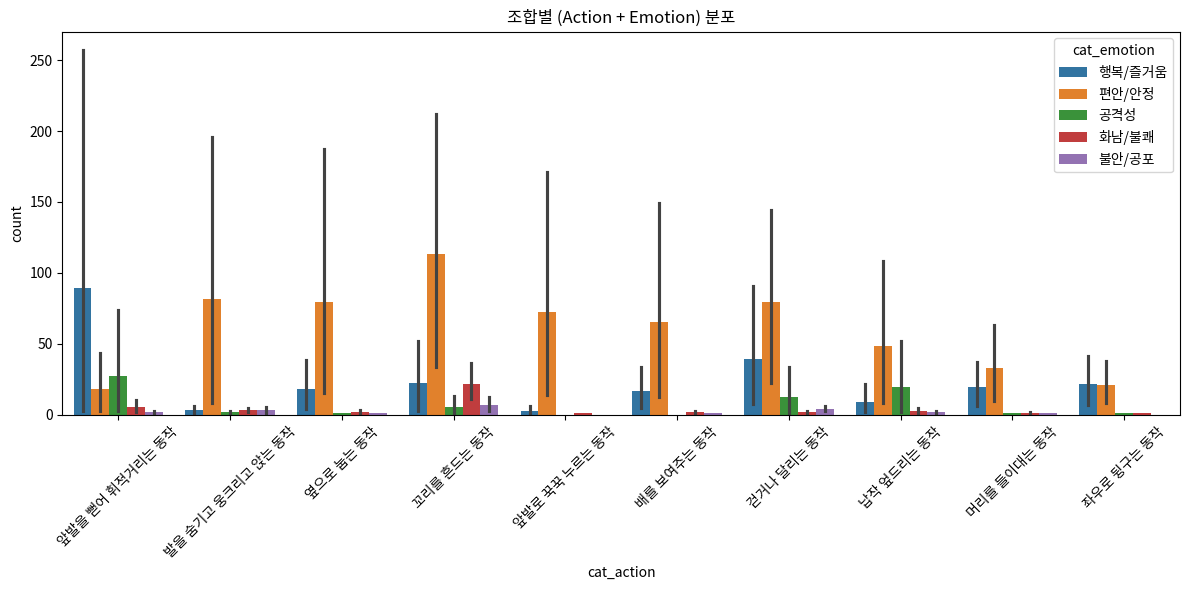

In [3]:
group_counts = (
    df.groupby(["cat_action", "cat_emotion", "owner_situation"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

# print(group_counts.head(10))  # 상위 10개 조합 출력

pivot = df.pivot_table(
    index="cat_action", columns="cat_emotion", values="meta_json", aggfunc="count", fill_value=0
)
# print(pivot)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import warnings

# matplotlib findfont 경고 끄기
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", message="findfont: Font family .* not found")

# NotoSansCJK 폰트 경로 지정
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
sns.barplot(
    data=group_counts,
    x="cat_action",
    y="count",
    hue="cat_emotion"
)
plt.xticks(rotation=45)
plt.title("조합별 (Action + Emotion) 분포")
plt.tight_layout()
plt.show()



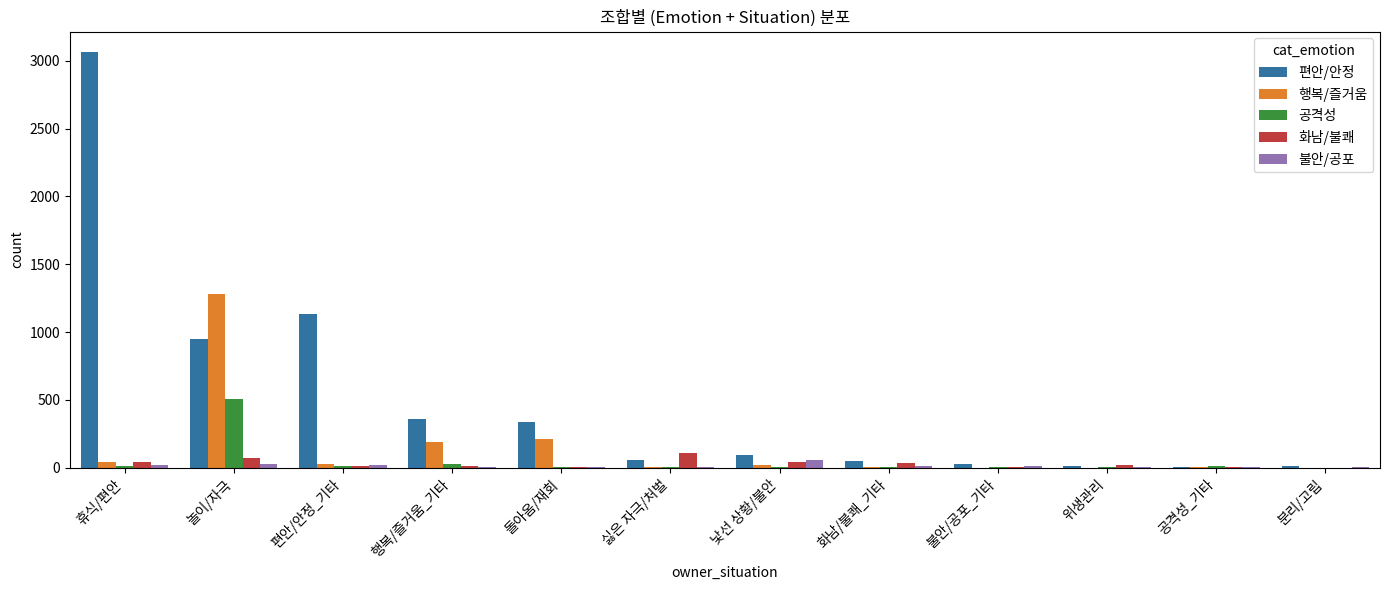

In [4]:
group_emotion_situation = (
    df.groupby(["cat_emotion", "owner_situation"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=group_emotion_situation,
    x="owner_situation",
    y="count",
    hue="cat_emotion"
)
plt.xticks(rotation=45, ha='right')
plt.title("조합별 (Emotion + Situation) 분포")
plt.tight_layout()
plt.show()


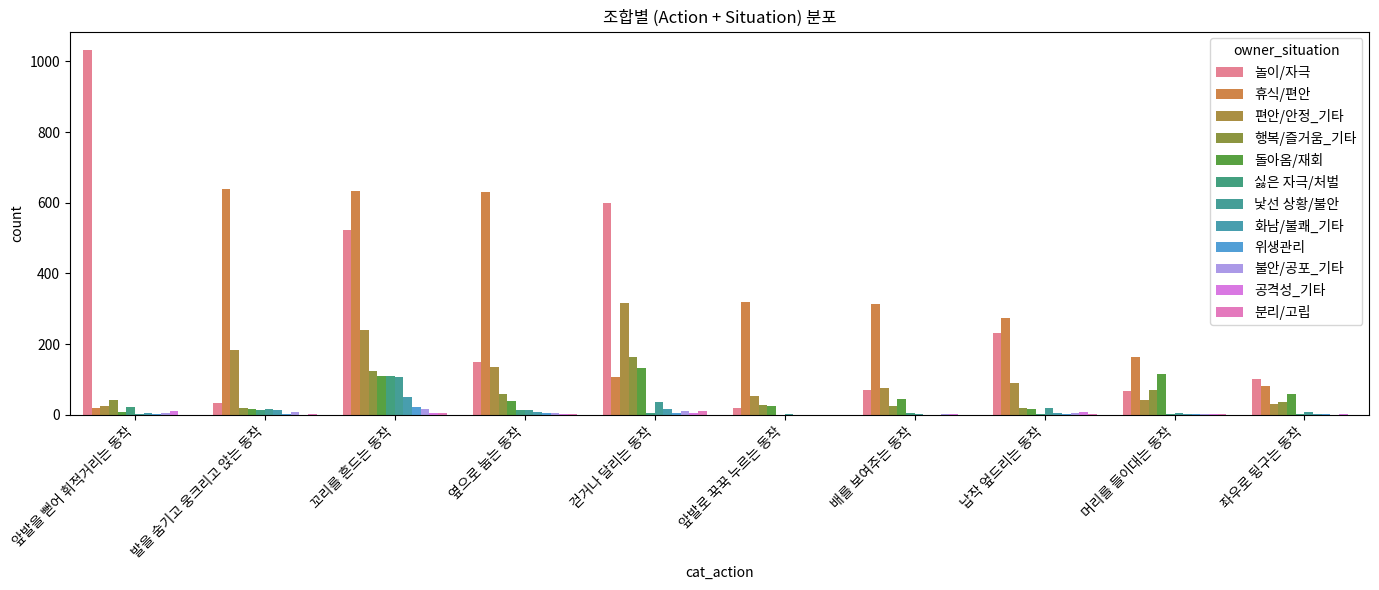

In [5]:
group_action_situation = (
    df.groupby(["cat_action", "owner_situation"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=group_action_situation,
    x="cat_action",
    y="count",
    hue="owner_situation"
)
plt.xticks(rotation=45, ha='right')
plt.title("조합별 (Action + Situation) 분포")
plt.tight_layout()
plt.show()


In [6]:
print("🎯 상위 15개 라벨 조합 (Action + Emotion + Situation):\n")
print(group_counts.head(15))


🎯 상위 15개 라벨 조합 (Action + Emotion + Situation):

            cat_action cat_emotion owner_situation  count
226    앞발을 뻗어 휘적거리는 동작      행복/즐거움           놀이/자극    673
171  발을 숨기고 웅크리고 앉는 동작       편안/안정           휴식/편안    628
254          옆으로 눕는 동작       편안/안정           휴식/편안    627
74          꼬리를 흔드는 동작       편안/안정           휴식/편안    586
200      앞발로 꾹꾹 누르는 동작       편안/안정           휴식/편안    318
186         배를 보여주는 동작       편안/안정           휴식/편안    308
19          걷거나 달리는 동작       편안/안정           놀이/자극    308
25          걷거나 달리는 동작       편안/안정        편안/안정_기타    298
65          꼬리를 흔드는 동작       편안/안정           놀이/자극    294
119         납작 엎드리는 동작       편안/안정           휴식/편안    266
207    앞발을 뻗어 휘적거리는 동작         공격성           놀이/자극    259
71          꼬리를 흔드는 동작       편안/안정        편안/안정_기타    224
30          걷거나 달리는 동작      행복/즐거움           놀이/자극    208
168  발을 숨기고 웅크리고 앉는 동작       편안/안정        편안/안정_기타    182
143        머리를 들이대는 동작       편안/안정           휴식/편안    153


In [7]:
# 유니크한 (cat_action, cat_emotion, owner_situation) 조합 개수
unique_combinations = group_counts.shape[0]
print(f"🎯 유니크한 조합 개수: {unique_combinations}개")


🎯 유니크한 조합 개수: 282개


In [8]:
# 조합별 샘플 수의 통계
print("📊 조합별 샘플 수 통계 (group_counts['count'].describe()):\n")
print(group_counts['count'].describe())


📊 조합별 샘플 수 통계 (group_counts['count'].describe()):

count    282.000000
mean      31.829787
std       89.641910
min        1.000000
25%        1.000000
50%        4.000000
75%       18.000000
max      673.000000
Name: count, dtype: float64


In [9]:
min_count = group_counts['count'].min()
max_count = group_counts['count'].max()

print(f"🔻 최소 샘플 수 조합:\n{group_counts[group_counts['count'] == min_count]}")
print(f"\n🔺 최대 샘플 수 조합:\n{group_counts[group_counts['count'] == max_count]}")


🔻 최소 샘플 수 조합:
          cat_action cat_emotion owner_situation  count
261        옆으로 눕는 동작       화남/불쾌          돌아옴/재회      1
214  앞발을 뻗어 휘적거리는 동작         공격성        화남/불쾌_기타      1
217  앞발을 뻗어 휘적거리는 동작       불안/공포        불안/공포_기타      1
218  앞발을 뻗어 휘적거리는 동작       편안/안정          공격성_기타      1
225  앞발을 뻗어 휘적거리는 동작      행복/즐거움        낯선 상황/불안      1
..               ...         ...             ...    ...
279       좌우로 뒹구는 동작      행복/즐거움        화남/불쾌_기타      1
40        걷거나 달리는 동작       화남/불쾌            위생관리      1
16        걷거나 달리는 동작       불안/공포           휴식/편안      1
232  앞발을 뻗어 휘적거리는 동작       화남/불쾌          공격성_기타      1
233  앞발을 뻗어 휘적거리는 동작       화남/불쾌        낯선 상황/불안      1

[80 rows x 4 columns]

🔺 최대 샘플 수 조합:
          cat_action cat_emotion owner_situation  count
226  앞발을 뻗어 휘적거리는 동작      행복/즐거움           놀이/자극    673


In [10]:
print("🏆 상위 10개 조합:")
print(group_counts.head(10))

print("\n🐾 하위 10개 조합:")
print(group_counts.tail(10))


🏆 상위 10개 조합:
            cat_action cat_emotion owner_situation  count
226    앞발을 뻗어 휘적거리는 동작      행복/즐거움           놀이/자극    673
171  발을 숨기고 웅크리고 앉는 동작       편안/안정           휴식/편안    628
254          옆으로 눕는 동작       편안/안정           휴식/편안    627
74          꼬리를 흔드는 동작       편안/안정           휴식/편안    586
200      앞발로 꾹꾹 누르는 동작       편안/안정           휴식/편안    318
186         배를 보여주는 동작       편안/안정           휴식/편안    308
19          걷거나 달리는 동작       편안/안정           놀이/자극    308
25          걷거나 달리는 동작       편안/안정        편안/안정_기타    298
65          꼬리를 흔드는 동작       편안/안정           놀이/자극    294
119         납작 엎드리는 동작       편안/안정           휴식/편안    266

🐾 하위 10개 조합:
          cat_action cat_emotion owner_situation  count
7         걷거나 달리는 동작       불안/공포          공격성_기타      1
273       좌우로 뒹구는 동작      행복/즐거움          공격성_기타      1
281       좌우로 뒹구는 동작       화남/불쾌            위생관리      1
4         걷거나 달리는 동작         공격성            위생관리      1
1         걷거나 달리는 동작         공격성        낯선 상황/불안      1

> 멀티 태스크용으로 라벨 불균형 어떡하지

---

In [11]:
# 조합 빈도 집계
emotion_situation_counts = (
    df
    .groupby(["cat_emotion", "owner_situation"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

print("🎯 Emotion + Situation 조합 상위:")
print(emotion_situation_counts.head(10))  # 상위 10개 확인


🎯 Emotion + Situation 조합 상위:
   cat_emotion owner_situation  count
34       편안/안정           휴식/편안   3063
37      행복/즐거움           놀이/자극   1283
31       편안/안정        편안/안정_기타   1130
25       편안/안정           놀이/자극    948
2          공격성           놀이/자극    503
32       편안/안정       행복/즐거움_기타    357
26       편안/안정          돌아옴/재회    340
38      행복/즐거움          돌아옴/재회    210
43      행복/즐거움       행복/즐거움_기타    187
52       화남/불쾌        싫은 자극/처벌    108


In [12]:
print(emotion_situation_counts['count'].describe())

count      58.000000
mean      154.758621
std       467.064191
min         1.000000
25%         6.000000
50%        14.000000
75%        46.500000
max      3063.000000
Name: count, dtype: float64


---

### 전략 : 언더샘플링   
- 무작위 샘플링의 경우, 다양성이 부족한 데이터가 남을 수 있음   
   - ex) 고양이가 많이 출현하지 않음/ 고양이 크기다 왔다갔다함/ etc   
> 그렇다면, 샘플링 전에 고양이가 실제로 얼마나 존재하는지 빈도를 기록하느 칼럼 추가하기(meta)    
> 하위 샘플도 상위 샘플도 모두 진행하기    

In [13]:
import pandas as pd

df = pd.read_csv("./data_fin/final_total_dataset.csv")
df_cat = pd.read_csv("./data_fin/cat_detection_frame_counts.csv")

df_cat = df_cat.rename(columns={"json_file": "meta_json"})
df_merged = pd.merge(df, df_cat[['meta_json', 'real_cat']], on='meta_json', how='left')

In [14]:
df_merged['owner_situation'] = df_merged['owner_situation'].apply(
    lambda x: '기타' if isinstance(x, str) and x.endswith('_기타') else x
)

# 결과 확인
print(df_merged['owner_situation'].value_counts())

owner_situation
휴식/편안       3179
놀이/자극       2829
기타          1961
돌아옴/재회       565
낯선 상황/불안     212
싫은 자극/처벌     172
위생관리          38
분리/고립         20
Name: count, dtype: int64


count    8976.000000
mean        0.575032
std         0.332581
min         0.000000
25%         0.279014
50%         0.619048
75%         0.891304
max         1.000000
Name: cat_ratio, dtype: float64


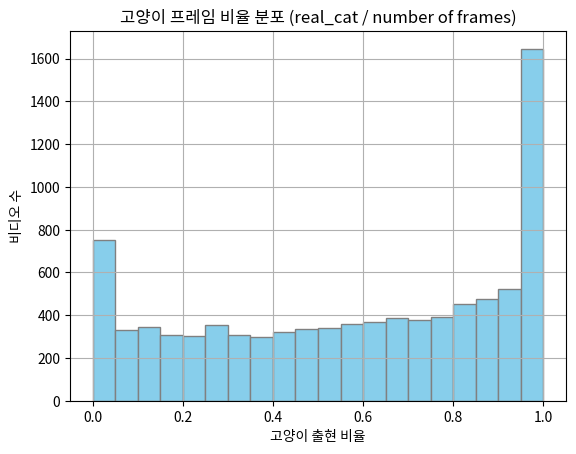

In [15]:
df_merged["cat_ratio"] = df_merged["real_cat"] / df_merged["number of frames"]

print(df_merged["cat_ratio"].describe())

# 시각화
plt.hist(df_merged["cat_ratio"], bins=20, color="skyblue", edgecolor="gray")
plt.title("고양이 프레임 비율 분포 (real_cat / number of frames)")
plt.xlabel("고양이 출현 비율")
plt.ylabel("비디오 수")
plt.grid(True)
plt.show()

In [16]:
low_cat_df = df_merged[df_merged["cat_ratio"] <= 0.1]

print(f"총 {len(low_cat_df)}개의 고양이 출현 비율 10% 이하 영상 발견")
print(low_cat_df[["meta_json", "file_path", "number of frames", "real_cat", "cat_ratio"]])

총 1092개의 고양이 출현 비율 10% 이하 영상 발견
                       meta_json  \
0     cat-armstretch-068412.json   
6     cat-armstretch-034328.json   
15    cat-armstretch-071707.json   
16    cat-armstretch-057466.json   
34    cat-armstretch-087918.json   
...                          ...   
8902     cat-getdown-044578.json   
8914     cat-getdown-045810.json   
8933     cat-getdown-079442.json   
8948     cat-getdown-034545.json   
8951     cat-getdown-047141.json   

                                          file_path  number of frames  \
0     ./data_image/ARMSTRETCH/cat-armstretch-068412                85   
6     ./data_image/ARMSTRETCH/cat-armstretch-034328               108   
15    ./data_image/ARMSTRETCH/cat-armstretch-071707                88   
16    ./data_image/ARMSTRETCH/cat-armstretch-057466                96   
34    ./data_image/ARMSTRETCH/cat-armstretch-087918                90   
...                                             ...               ...   
8902        ./data_image

In [17]:
# low_cat_df에서 각 라벨별 분포 비율 계산 함수
def label_ratio(df, column):
    counts = df[column].value_counts(normalize=True)  # 비율 계산
    return counts

# emotion, action, situation 라벨 비율 계산
emotion_ratio = label_ratio(low_cat_df, "cat_emotion")
action_ratio = label_ratio(low_cat_df, "cat_action")
situation_ratio = label_ratio(low_cat_df, "owner_situation")

print("== Emotion 비율 ==")
print(emotion_ratio)
print("\n== Action 비율 ==")
print(action_ratio)
print("\n== Situation 비율 ==")
print(situation_ratio)


== Emotion 비율 ==
cat_emotion
편안/안정     0.690476
행복/즐거움    0.217949
공격성       0.054029
화남/불쾌     0.028388
불안/공포     0.009158
Name: proportion, dtype: float64

== Action 비율 ==
cat_action
옆으로 눕는 동작            0.170330
꼬리를 흔드는 동작           0.151099
앞발을 뻗어 휘적거리는 동작      0.123626
배를 보여주는 동작           0.119048
걷거나 달리는 동작           0.103480
발을 숨기고 웅크리고 앉는 동작    0.075092
앞발로 꾹꾹 누르는 동작        0.074176
머리를 들이대는 동작          0.074176
납작 엎드리는 동작           0.070513
좌우로 뒹구는 동작           0.038462
Name: proportion, dtype: float64

== Situation 비율 ==
owner_situation
휴식/편안       0.412088
놀이/자극       0.268315
기타          0.219780
돌아옴/재회      0.066850
낯선 상황/불안    0.015568
싫은 자극/처벌    0.013736
위생관리        0.001832
분리/고립       0.001832
Name: proportion, dtype: float64


In [18]:
# 1) low cat ratio 데이터 필터링
low_cat_df = df_merged[df_merged["cat_ratio"] <= 0.1]

# 2) 전체 대비 비율 확인
print(f"제거할 샘플 수: {len(low_cat_df)} / 전체 {len(df_merged)} ({len(low_cat_df)/len(df_merged)*100:.2f}%)")

# 3) 제거된 데이터 제외한 새로운 학습용 데이터셋 생성
df_train_filtered = df_merged[df_merged["cat_ratio"] > 0.1]


제거할 샘플 수: 1092 / 전체 8976 (12.17%)


In [19]:
import pandas as pd

# 예시: df는 이미 로드된 데이터프레임이라고 가정

# 각 라벨별 개수와 비율 출력 함수
def print_label_distribution(df, column_name):
    counts = df[column_name].value_counts()
    proportions = df[column_name].value_counts(normalize=True)
    print(f"== {column_name} 분포 ==")
    for label, count in counts.items():
        print(f"{label}: {count} ({proportions[label]*100:.2f}%)")
    print()

# emotion, action, situation 분포 출력
print_label_distribution(df_train_filtered, 'cat_emotion')
print_label_distribution(df_train_filtered, 'cat_action')
print_label_distribution(df_train_filtered, 'owner_situation')


== cat_emotion 분포 ==
편안/안정: 5331 (67.62%)
행복/즐거움: 1547 (19.62%)
공격성: 533 (6.76%)
화남/불쾌: 314 (3.98%)
불안/공포: 159 (2.02%)

== cat_action 분포 ==
꼬리를 흔드는 동작: 1782 (22.60%)
걷거나 달리는 동작: 1297 (16.45%)
앞발을 뻗어 휘적거리는 동작: 1039 (13.18%)
옆으로 눕는 동작: 873 (11.07%)
발을 숨기고 웅크리고 앉는 동작: 860 (10.91%)
납작 엎드리는 동작: 592 (7.51%)
배를 보여주는 동작: 408 (5.18%)
머리를 들이대는 동작: 391 (4.96%)
앞발로 꾹꾹 누르는 동작: 362 (4.59%)
좌우로 뒹구는 동작: 280 (3.55%)

== owner_situation 분포 ==
휴식/편안: 2729 (34.61%)
놀이/자극: 2536 (32.17%)
기타: 1721 (21.83%)
돌아옴/재회: 492 (6.24%)
낯선 상황/불안: 195 (2.47%)
싫은 자극/처벌: 157 (1.99%)
위생관리: 36 (0.46%)
분리/고립: 18 (0.23%)



In [20]:
import pandas as pd

def smart_undersample_by_combination(df, max_per_combination=90, random_state=42):
    group_cols = ['cat_action', 'cat_emotion', 'owner_situation']
    grouped = df.groupby(group_cols)

    result_dfs = []

    for name, group in grouped:
        n_samples = len(group)

        if n_samples <= max_per_combination:
            result_dfs.append(group)
            continue  # 저빈도 조합은 그대로 유지

        # 고빈도 조합인 경우, cat_ratio 구간에 따라 나누기
        bins = [0.0, 0.4, 0.8, 1.01]
        labels = ['low', 'mid', 'high']
        group = group.copy()
        group['cat_ratio_bin'] = pd.cut(group['cat_ratio'], bins=bins, labels=labels, include_lowest=True)

        # 각 구간에서 동일한 수만큼 샘플링 (최대 max_per_combination // 3개씩)
        samples_per_bin = max_per_combination // 3
        sampled_parts = []

        for label in labels:
            part = group[group['cat_ratio_bin'] == label]
            if len(part) <= samples_per_bin:
                sampled_parts.append(part)  # 적으면 전부 사용
            else:
                sampled_parts.append(part.sample(n=samples_per_bin, random_state=random_state))

        undersampled_group = pd.concat(sampled_parts)
        result_dfs.append(undersampled_group)

    df_final = pd.concat(result_dfs).reset_index(drop=True)
    return df_final

df_sampled = smart_undersample_by_combination(df_train_filtered, max_per_combination=90)
print("✅ 샘플링 후 데이터 수:", len(df_sampled))
print("🎯 유니크 조합 수:", df_sampled.groupby(['cat_action', 'cat_emotion', 'owner_situation']).ngroups)


✅ 샘플링 후 데이터 수: 4128
🎯 유니크 조합 수: 205


/tmp/ipykernel_3724742/3486693309.py:16: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Noto Sans CJK JP.
  plt.tight_layout()
/home/dibaeck/sketch/anaconda3/envs/dibk311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Noto Sans CJK JP.
  fig.canvas.print_figure(bytes_io, **kw)


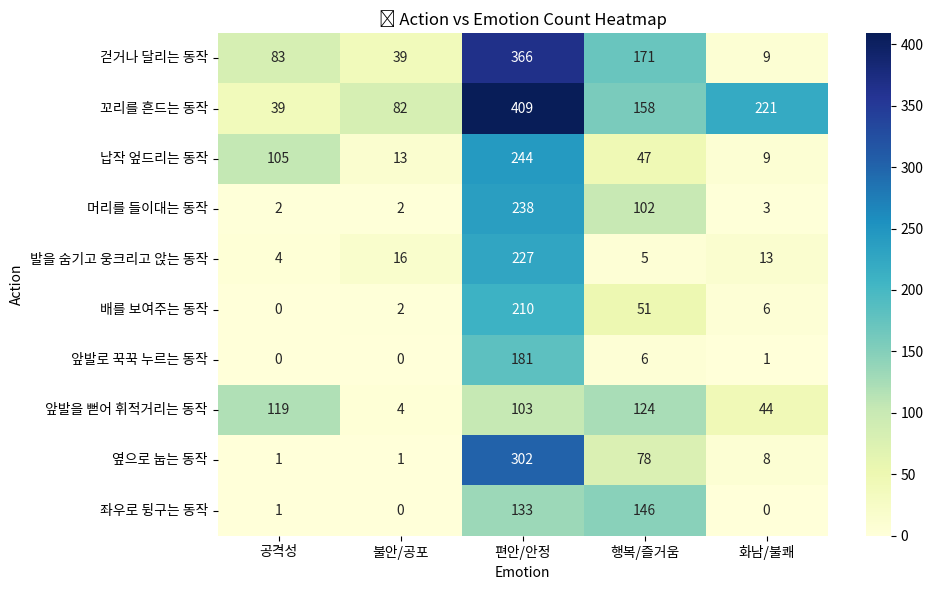

In [21]:
def plot_action_emotion_heatmap(df):
    pivot = pd.pivot_table(
        df, 
        index='cat_action', 
        columns='cat_emotion', 
        values='meta_json', 
        aggfunc='count', 
        fill_value=0
    )

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
    plt.title("🔥 Action vs Emotion Count Heatmap")
    plt.xlabel("Emotion")
    plt.ylabel("Action")
    plt.tight_layout()
    plt.show()


plot_action_emotion_heatmap(df_sampled)

/tmp/ipykernel_3724742/2560485732.py:17: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) Noto Sans CJK JP.
  plt.tight_layout()
/tmp/ipykernel_3724742/2560485732.py:17: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Noto Sans CJK JP.
  plt.tight_layout()
/tmp/ipykernel_3724742/2560485732.py:17: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) Noto Sans CJK JP.
  plt.tight_layout()
/home/dibaeck/sketch/anaconda3/envs/dibk311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) Noto Sans CJK JP.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dibaeck/sketch/anaconda3/envs/dibk311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Noto Sans CJK JP.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dibaeck/sketch/anaconda3/envs/dibk311/lib/python3.11/site-packages/I

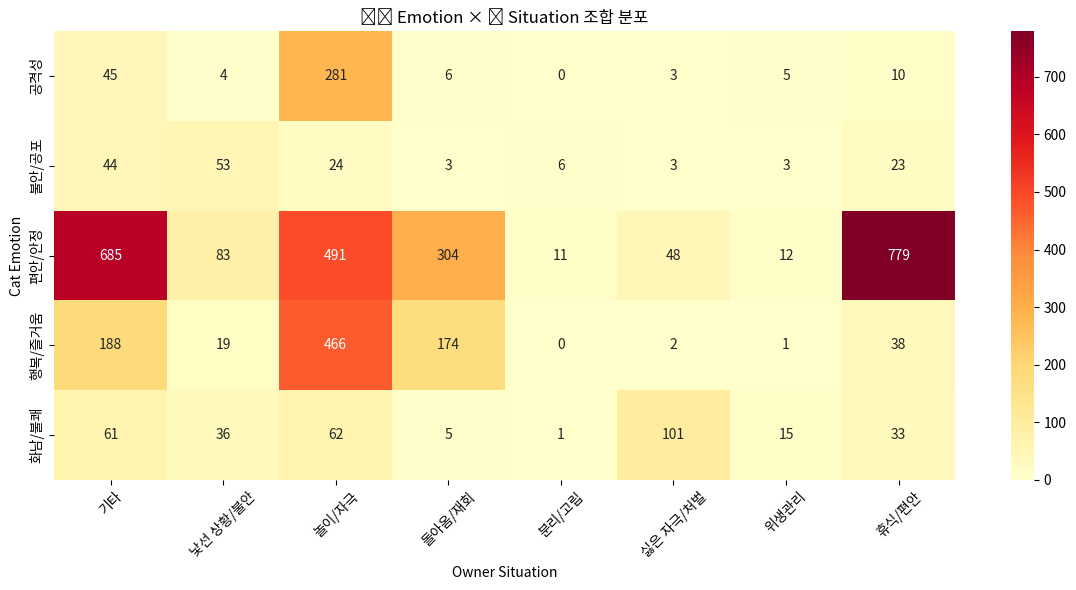

In [22]:
def plot_emotion_situation_heatmap(df):
    pivot = pd.pivot_table(
        df,
        index='cat_emotion',
        columns='owner_situation',
        values='meta_json',
        aggfunc='count',
        fill_value=0
    )

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, annot=True, fmt='d', cmap='YlOrRd')
    plt.title("❤️ Emotion × 🏠 Situation 조합 분포")
    plt.xlabel("Owner Situation")
    plt.ylabel("Cat Emotion")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return pivot 

pivot = plot_emotion_situation_heatmap(df_sampled)

In [23]:
pivot

owner_situation,기타,낯선 상황/불안,놀이/자극,돌아옴/재회,분리/고립,싫은 자극/처벌,위생관리,휴식/편안
cat_emotion,,,,,,,,
공격성,45,4,281,6,0,3,5,10
불안/공포,44,53,24,3,6,3,3,23
편안/안정,685,83,491,304,11,48,12,779
행복/즐거움,188,19,466,174,0,2,1,38
화남/불쾌,61,36,62,5,1,101,15,33


In [24]:
# 필요한 컬럼만 선택
cols_to_save = ['meta_json', 'file_path', 'number of frames', 'cat_action', 'cat_emotion', 'owner_situation', 'real_cat']

# 선택한 컬럼으로 새로운 DataFrame 생성
df_to_save = df_sampled[cols_to_save]

# CSV 파일로 저장
# df_to_save.to_csv('./data_fin/final_total_dataset_v2.csv', index=False)

# print("✅ 선택한 컬럼만 저장 완료: ./data_fin/final_total_dataset_v2.csv")


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 예: csv를 이미 로드한 DataFrame이 df라고 가정
df = pd.read_csv('./data_fin/final_total_dataset_v2.csv')

# emotion_situation 컬럼 생성
df['emotion_situation'] = df['cat_emotion'] + "__" + df['owner_situation']

# 라벨별 샘플 수 계산
label_counts = df['emotion_situation'].value_counts()

# 샘플 1개인 라벨과 그 데이터 추출 (무조건 train)
single_sample_labels = label_counts[label_counts == 1].index
df_single = df[df['emotion_situation'].isin(single_sample_labels)]

# 나머지 데이터 (샘플 2개 이상)
df_multi = df[~df['emotion_situation'].isin(single_sample_labels)]

# multi 데이터는 stratify 하여 train/val 분할
train_multi, val_multi = train_test_split(
    df_multi,
    test_size=0.2,
    random_state=42,
    stratify=df_multi['emotion_situation']
)

# single 샘플 데이터는 무조건 train에 추가
train_df = pd.concat([train_multi, df_single], ignore_index=True)
val_df = val_multi.reset_index(drop=True)

print(f"Train size: {len(train_df)}")
print(f"Val size: {len(val_df)}")


Train size: 3302
Val size: 826


In [28]:
# file_path에서 앞의 './data_image/' 또는 'data_image/' 제거
train_df['file_path'] = train_df['file_path'].str.replace(r'^\.?/?.*data_image/', '', regex=True)
val_df['file_path'] = val_df['file_path'].str.replace(r'^\.?/?.*data_image/', '', regex=True)

In [30]:
# 파일로 저장 (필요시)
train_df.to_csv('./data_fin/train_dataset.csv', index=False)
val_df.to_csv('./data_fin/val_dataset.csv', index=False)

In [31]:
print("Train emotion_situation 분포:")
print(train_df['emotion_situation'].value_counts())

print("\nVal emotion_situation 분포:")
print(val_df['emotion_situation'].value_counts())

print(f"\nTrain size: {len(train_df)}")
print(f"Val size: {len(val_df)}")


Train emotion_situation 분포:
emotion_situation
편안/안정__휴식/편안        623
편안/안정__기타           548
편안/안정__놀이/자극        393
행복/즐거움__놀이/자극       373
편안/안정__돌아옴/재회       243
공격성__놀이/자극          225
행복/즐거움__기타          150
행복/즐거움__돌아옴/재회      139
화남/불쾌__싫은 자극/처벌      81
편안/안정__낯선 상황/불안      66
화남/불쾌__놀이/자극         50
화남/불쾌__기타            49
불안/공포__낯선 상황/불안      42
편안/안정__싫은 자극/처벌      38
공격성__기타              36
불안/공포__기타            35
행복/즐거움__휴식/편안        30
화남/불쾌__낯선 상황/불안      29
화남/불쾌__휴식/편안         26
불안/공포__놀이/자극         19
불안/공포__휴식/편안         18
행복/즐거움__낯선 상황/불안     15
화남/불쾌__위생관리          12
편안/안정__위생관리          10
편안/안정__분리/고립          9
공격성__휴식/편안            8
공격성__돌아옴/재회           5
불안/공포__분리/고립          5
공격성__위생관리             4
화남/불쾌__돌아옴/재회         4
공격성__낯선 상황/불안         3
불안/공포__돌아옴/재회         3
불안/공포__위생관리           3
불안/공포__싫은 자극/처벌       2
행복/즐거움__싫은 자극/처벌      2
공격성__싫은 자극/처벌         2
행복/즐거움__위생관리          1
화남/불쾌__분리/고립          1
Name: count, dtype: int64

Val emotion_sit